## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 35)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pickle

## Data Preparation

In [2]:
# loading data

df= pd.read_csv('kidney_disease.csv')
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


In [3]:
df.shape

(400, 26)

In [4]:
# dropping id column
df.drop('id', axis = 1, inplace = True)

In [5]:
# renaming columns

df.columns = ['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'red_blood_cells', 'pus_cell',
              'pus_cell_clumps', 'bacteria', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
              'potassium', 'haemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count',
              'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'peda_edema',
              'aanemia', 'class']

In [6]:
df.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


In [7]:
train,test = train_test_split(df, test_size=0.2, random_state=42)

In [8]:
train.describe()

,age,blood_pressure,specific_gravity,albumin,sugar,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin
count,315.000000,309.000000,283.000000,284.000000,281.000000,285.000000,305.000000,307.000000,246.000000,245.000000,277.000000
mean,50.901587,75.954693,1.017456,0.992958,0.437722,150.308772,55.307213,2.865309,137.445122,4.696327,12.598917
std,17.522501,14.078095,0.005779,1.334492,1.077630,78.066666,50.065851,5.538349,11.157410,3.573724,2.862558
min,2.000000,50.000000,1.005000,0.000000,0.000000,70.000000,10.000000,0.400000,4.500000,2.500000,3.100000
25%,41.000000,70.000000,1.010000,0.000000,0.000000,100.000000,27.000000,0.900000,135.000000,3.800000,10.700000
50%,54.000000,70.000000,1.020000,0.000000,0.000000,123.000000,40.000000,1.200000,138.000000,4.400000,12.700000
75%,64.000000,80.000000,1.020000,2.000000,0.000000,169.000000,60.000000,2.700000,142.000000,4.900000,15.000000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 320 entries, 3 to 102
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      315 non-null    float64
 1   blood_pressure           309 non-null    float64
 2   specific_gravity         283 non-null    float64
 3   albumin                  284 non-null    float64
 4   sugar                    281 non-null    float64
 5   red_blood_cells          200 non-null    object 
 6   pus_cell                 268 non-null    object 
 7   pus_cell_clumps          316 non-null    object 
 8   bacteria                 316 non-null    object 
 9   blood_glucose_random     285 non-null    float64
 10  blood_urea               305 non-null    float64
 11  serum_creatinine         307 non-null    float64
 12  sodium                   246 non-null    float64
 13  potassium                245 non-null    float64
 14  haemoglobin              2

In [10]:
train['packed_cell_volume'].describe()

count     263
unique     41
top        41
freq       18
Name: packed_cell_volume, dtype: object

In [101]:
def convert_to_numeric(name_of_data, column):
    '''Converting numerical columns with data type object to float'''
    data = pd.to_numeric(name_of_data[column], errors = 'coerce')
    return data

In [102]:
#converting packed cell volume to numeric

train['packed_cell_volume'] = convert_to_numeric(train,'packed_cell_volume')
train['packed_cell_volume']

3      32.0
18     37.0
202    24.0
250    48.0
274    44.0
       ... 
71     28.0
106    17.0
270    41.0
348    44.0
102    52.0
Name: packed_cell_volume, Length: 320, dtype: float64

In [103]:
train['white_blood_cell_count'] = convert_to_numeric(train,'white_blood_cell_count')
train['white_blood_cell_count'].describe()

count      230.000000
mean      8429.565217
std       3025.754774
min       2200.000000
25%       6425.000000
50%       8050.000000
75%       9800.000000
max      26400.000000
Name: white_blood_cell_count, dtype: float64

In [104]:
train['red_blood_cell_count'] = convert_to_numeric(train, 'red_blood_cell_count')
train['red_blood_cell_count'].describe()

count    211.000000
mean       4.723697
std        1.005133
min        2.100000
25%        4.000000
50%        4.800000
75%        5.500000
max        8.000000
Name: red_blood_cell_count, dtype: float64

In [105]:
# converting necessary columns to numerical type

# df['packed_cell_volume'] = pd.to_numeric(df['packed_cell_volume'], errors='coerce')
# df['white_blood_cell_count'] = pd.to_numeric(df['white_blood_cell_count'], errors='coerce')
# df['red_blood_cell_count'] = pd.to_numeric(df['red_blood_cell_count'], errors='coerce')

In [106]:
class FillNull:
    def _init_(self):
        self._fill_null = []
        

    def use_mean(self,data_name,column):
        import pandas as pd
        '''Filling null values with the mean value'''
        mean_data = data_name[column].fillna(data_name[column].mean())
        
        return mean_data
    
    def use_median(self,data_name,column):
        '''Filling null values with the median value'''
        median_data = data_name[column].fillna(data_name[column].median())
        
        return median_data
    
    def use_mode(self,data_name,column):
        '''Filling null values with the mode value'''
        mode_data = data_name[column].fillna(data_name[column].mode()[0])
        
        return mode_data     

In [107]:
#fill missing values with the mean for the age column
fill_null = FillNull()

train['age'] = fill_null.use_mean(train,'age')
train['age'].isnull()

3      False
18     False
202    False
250    False
274    False
       ...  
71     False
106    False
270    False
348    False
102    False
Name: age, Length: 320, dtype: bool

In [108]:
#fill missing values with the mean for columns
train['blood_pressure'] = fill_null.use_mean(train,'blood_pressure')
train['specific_gravity'] = fill_null.use_mean(train,'specific_gravity')
train['sodium'] = fill_null.use_mean(train,'sodium')
train['potassium'] = fill_null.use_mean(train,'potassium')
train['haemoglobin'] = fill_null.use_mean(train,'haemoglobin')
train['red_blood_cell_count'] = fill_null.use_mean(train,'red_blood_cell_count')
train['packed_cell_volume'] = fill_null.use_mean(train,'packed_cell_volume')

In [109]:
train['blood_glucose_random'] = fill_null.use_median(train,'blood_glucose_random')
train['blood_urea'] = fill_null.use_median(train,'blood_urea')
train['serum_creatinine'] = fill_null.use_median(train,'serum_creatinine')                                                   
train['white_blood_cell_count'] = fill_null.use_median(train,'white_blood_cell_count')    

In [110]:
train['albumin'] = fill_null.use_mode(train,'albumin') 
train['red_blood_cells'] = fill_null.use_mode(train,'red_blood_cells') 
train['pus_cell'] = fill_null.use_mode(train,'pus_cell') 
train['pus_cell_clumps'] = fill_null.use_mode(train,'pus_cell_clumps') 
train['bacteria'] = fill_null.use_mode(train,'bacteria') 
train['sugar'] = fill_null.use_mode(train,'sugar') 
train['hypertension'] = fill_null.use_mode(train,'hypertension') 
train['diabetes_mellitus'] = fill_null.use_mode(train,'diabetes_mellitus') 
train['coronary_artery_disease'] = fill_null.use_mode(train,'coronary_artery_disease') 
train['appetite'] = fill_null.use_mode(train,'appetite') 
train['peda_edema'] = fill_null.use_mode(train,'peda_edema') 
train['aanemia'] = fill_null.use_mode(train,'aanemia') 

In [111]:
train['specific_gravity'].isnull()

3      False
18     False
202    False
250    False
274    False
       ...  
71     False
106    False
270    False
348    False
102    False
Name: specific_gravity, Length: 320, dtype: bool

In [112]:
def convert_to_str(name_of_data, column):
    '''Converting numerical columns with data type float to string'''
    data = name_of_data[column].astype(str)
    return data

In [113]:
train['albumin'] = convert_to_str(train, 'albumin')
train['albumin']

3      4.0
18     0.0
202    0.0
250    0.0
274    0.0
      ... 
71     1.0
106    0.0
270    0.0
348    0.0
102    0.0
Name: albumin, Length: 320, dtype: object

In [114]:
train['sugar'] = convert_to_str(train, 'sugar')
train['sugar']

3      0.0
18     3.0
202    0.0
250    0.0
274    0.0
      ... 
71     0.0
106    0.0
270    0.0
348    0.0
102    0.0
Name: sugar, Length: 320, dtype: object

In [115]:
train['sugar'].unique()

array(['0.0', '3.0', '2.0', '4.0', '1.0', '5.0'], dtype=object)

In [116]:
# Extracting categorical and numerical columns

cat_cols = [col for col in train.columns if train[col].dtype == 'object']
num_cols = [col for col in train.columns if train[col].dtype != 'object']

In [117]:
num_cols

['age',
 'blood_pressure',
 'specific_gravity',
 'blood_glucose_random',
 'blood_urea',
 'serum_creatinine',
 'sodium',
 'potassium',
 'haemoglobin',
 'packed_cell_volume',
 'white_blood_cell_count',
 'red_blood_cell_count']

In [118]:
cat_cols

['albumin',
 'sugar',
 'red_blood_cells',
 'pus_cell',
 'pus_cell_clumps',
 'bacteria',
 'hypertension',
 'diabetes_mellitus',
 'coronary_artery_disease',
 'appetite',
 'peda_edema',
 'aanemia',
 'class']

In [119]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 320 entries, 3 to 102
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      320 non-null    float64
 1   blood_pressure           320 non-null    float64
 2   specific_gravity         320 non-null    float64
 3   albumin                  320 non-null    object 
 4   sugar                    320 non-null    object 
 5   red_blood_cells          320 non-null    object 
 6   pus_cell                 320 non-null    object 
 7   pus_cell_clumps          320 non-null    object 
 8   bacteria                 320 non-null    object 
 9   blood_glucose_random     320 non-null    float64
 10  blood_urea               320 non-null    float64
 11  serum_creatinine         320 non-null    float64
 12  sodium                   320 non-null    float64
 13  potassium                320 non-null    float64
 14  haemoglobin              3

In [120]:
# looking at unique values in categorical columns

for col in cat_cols:
    print(f"{col} has {train[col].unique()} values\n")

albumin has ['4.0' '0.0' '1.0' '2.0' '3.0' '5.0'] values

sugar has ['0.0' '3.0' '2.0' '4.0' '1.0' '5.0'] values

red_blood_cells has ['normal' 'abnormal'] values

pus_cell has ['abnormal' 'normal'] values

pus_cell_clumps has ['present' 'notpresent'] values

bacteria has ['notpresent' 'present'] values

hypertension has ['yes' 'no'] values

diabetes_mellitus has ['no' 'yes' '\tyes' '\tno'] values

coronary_artery_disease has ['no' 'yes' '\tno'] values

appetite has ['poor' 'good'] values

peda_edema has ['yes' 'no'] values

aanemia has ['yes' 'no'] values

class has ['ckd' 'notckd' 'ckd\t'] values



In [121]:
# looking at unique values in categorical columns

for col in cat_cols:
    print(f"{col} has {train[col].nunique()} values\n")

albumin has 6 values

sugar has 6 values

red_blood_cells has 2 values

pus_cell has 2 values

pus_cell_clumps has 2 values

bacteria has 2 values

hypertension has 2 values

diabetes_mellitus has 4 values

coronary_artery_disease has 3 values

appetite has 2 values

peda_edema has 2 values

aanemia has 2 values

class has 3 values



In [122]:
def replace_values(name_of_data, column, dict_value):
    '''To replace incorrect values.
    dict_value {a:b} is a dictionary that has the old value as 'key a' and the correct value as value b.
    Remember to import pandas before running your function'''
    
    data = name_of_data[column].replace(to_replace = dict_value)
    return data

In [123]:
train['diabetes_mellitus'] = replace_values(train, 'diabetes_mellitus', {'\tno':'no','\tyes':'yes',' yes':'yes'})

In [124]:
train['coronary_artery_disease'] = replace_values(train, 'coronary_artery_disease', {'\tno':'no'})
train['class'] = replace_values(train, 'class', {'ckd\t': 'ckd', 'notckd': 'not ckd'})

## Exploratory Data Analysis

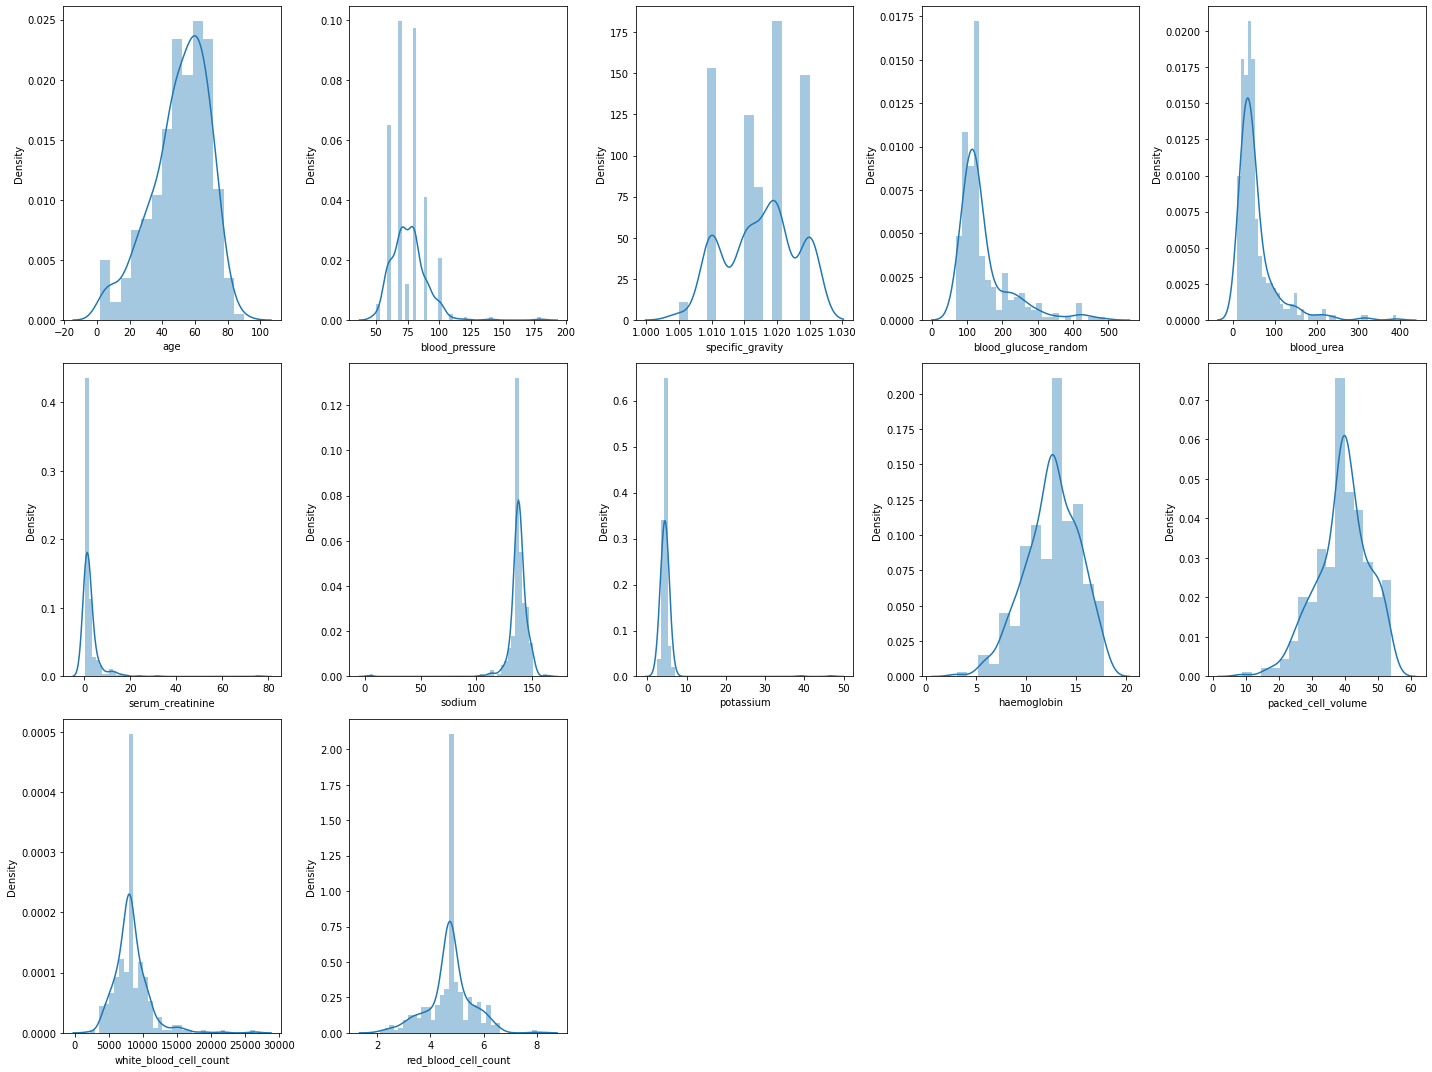

In [35]:
# checking numerical features distribution

plt.figure(figsize = (20, 15))
plotnumber = 1

for column in num_cols:
    if plotnumber <= 14:
        ax = plt.subplot(3, 5, plotnumber)
        sns.distplot(train[column])
        plt.xlabel(column)
        
    plotnumber += 1

plt.tight_layout()
plt.show()

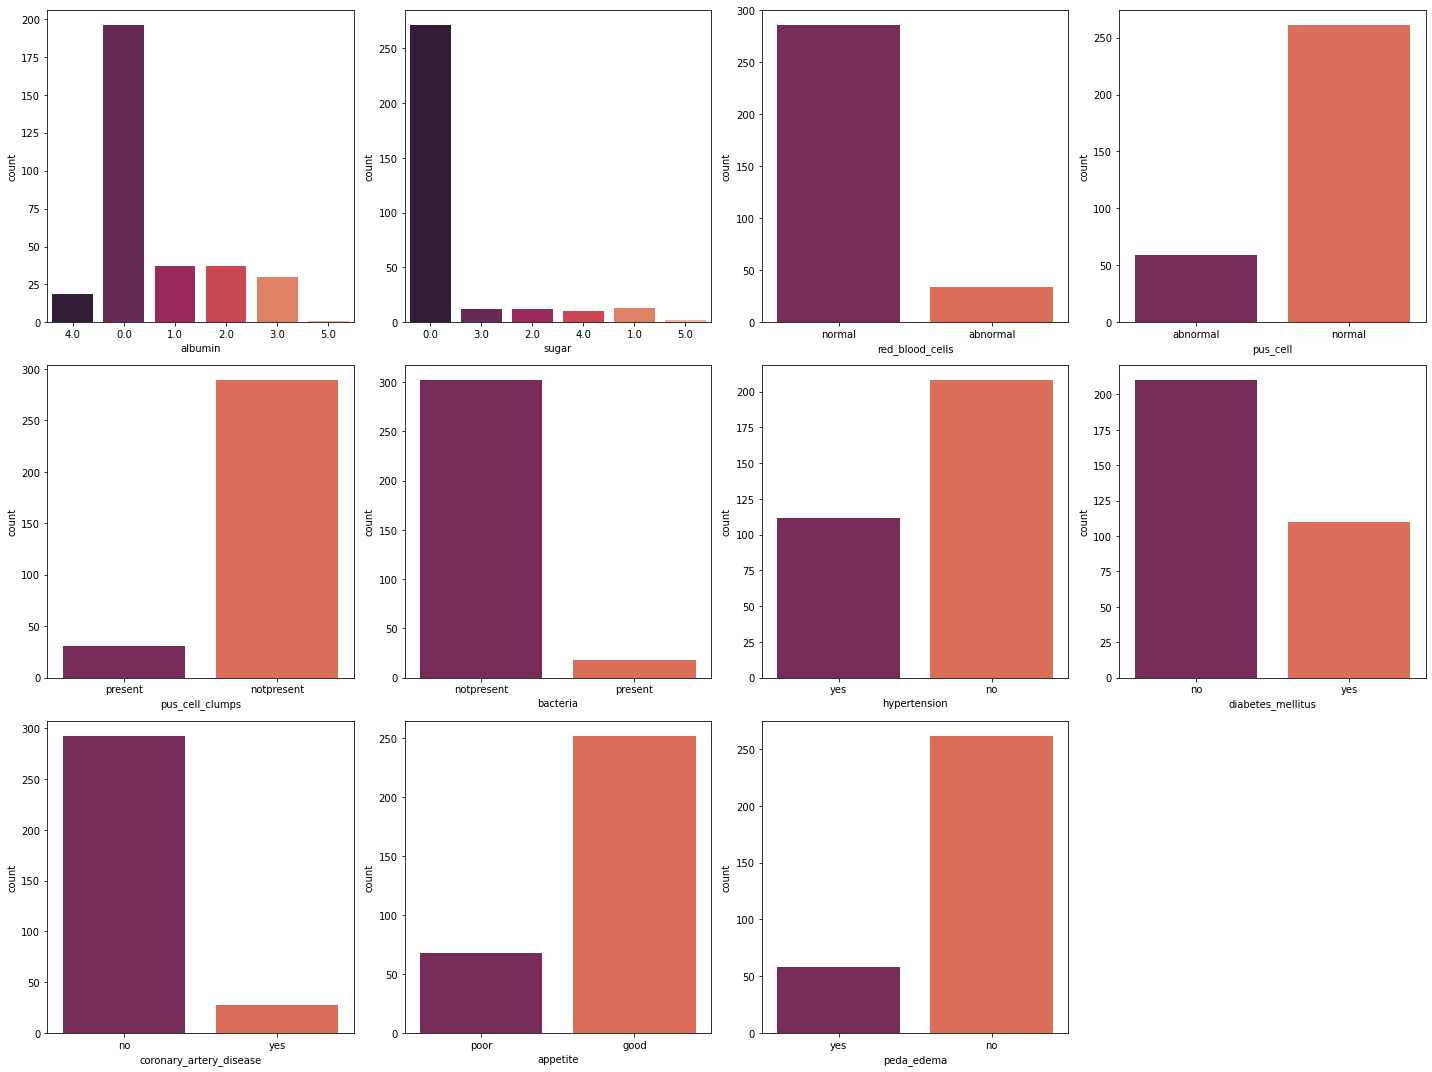

In [36]:
# looking at categorical columns

plt.figure(figsize = (20, 15))
plotnumber = 1

for column in cat_cols:
    if plotnumber <= 11:
        ax = plt.subplot(3, 4, plotnumber)
        sns.countplot(train[column], palette = 'rocket')
        plt.xlabel(column)
        
    plotnumber += 1

plt.tight_layout()
plt.show()


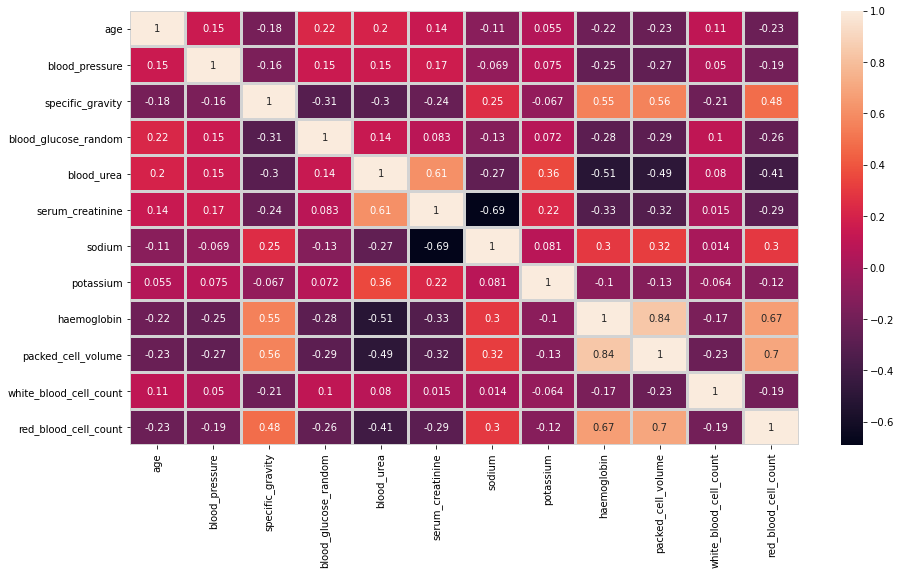

In [37]:
# heatmap of data

plt.figure(figsize = (15, 8))

sns.heatmap(train.corr(), annot = True, linewidths = 2, linecolor = 'lightgrey')
plt.show()

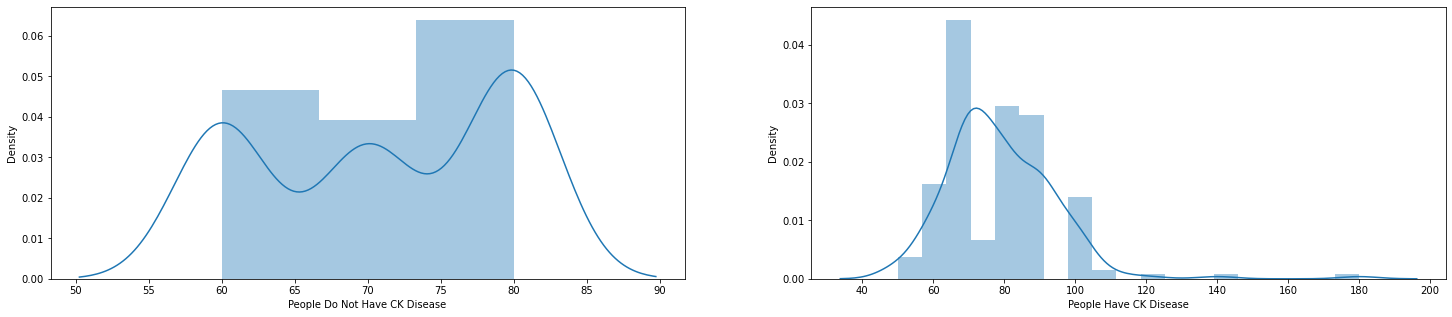

In [38]:
# Display blood pressure distribution based on heart disease
fig, (axis1, axis2) = plt.subplots(1, 2,figsize=(25, 5))
ax = sns.distplot(train[train['class'] == 'not ckd']['blood_pressure'], label='Do not have CK disease', ax = axis1)
ax.set(xlabel='People Do Not Have CK Disease')
ax = sns.distplot(train[train['class'] == 'ckd']['blood_pressure'], label = 'Have CK disease', ax = axis2)
ax.set(xlabel='People Have CK Disease')
plt.show()


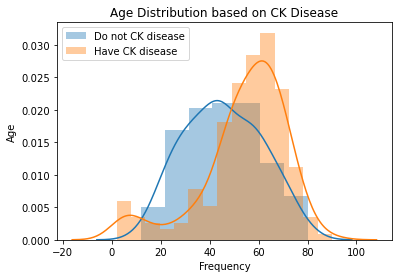

In [39]:
# Display age distribution based on heart disease
sns.distplot(train[train['class'] == 'not ckd']['age'], label='Do not CK disease')
sns.distplot(train[train['class'] == 'ckd']['age'], label = 'Have CK disease')
plt.xlabel('Frequency')
plt.ylabel('Age')
plt.title('Age Distribution based on CK Disease')
plt.legend()
plt.show()

In [40]:
# Get min, max and average of the age of the people do not have CK disease
print('Min age of people who do not have CK disease: ', min(train[train['class'] == 'not ckd']['age']))
print('Max age of people who do not have CK disease: ', max(train[train['class'] == 'not ckd']['age']))
print('Average age of people who do not have CK disease: ', train[train['class'] == 'not ckd']['age'].mean())

Min age of people who do not have CK disease:  12.0
Max age of people who do not have CK disease:  80.0
Average age of people who do not have CK disease:  45.41803278688525


In [41]:
# Get min, max and average of the age of the people have CK diseas
print('Min age of people who have CK disease: ', min(train[train['class'] == 'ckd']['age']))
print('Max age of people who have CK disease: ', max(train[train['class'] == 'ckd']['age']))
print('Average age of people who have CK disease: ', train[train['class'] == 'ckd']['age'].mean())

Min age of people who have CK disease:  2.0
Max age of people who have CK disease:  90.0
Average age of people who have CK disease:  54.28034311367644


Note:

From the data, I can say that the heart disease infects the old and young people, and the probability of the old people te be infected is higher than young people.

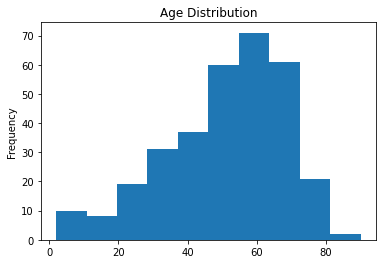

In [42]:
# Display age distribution
train['age'].plot(kind = 'hist', title = 'Age Distribution')
plt.show()

## BloodPressure Exploration

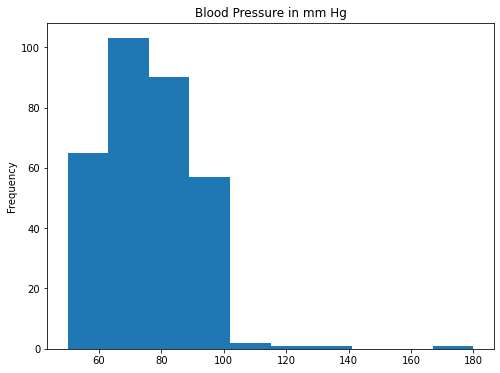

In [43]:
# Display blood pressure distribution
train['blood_pressure'].plot(kind = 'hist', title = 'Blood Pressure in mm Hg', figsize = (8, 6))
plt.show()

In [44]:
# Get min, max and average of the  blood pressure of the people do not haveCK disease
print('Min blood pressure of people who do not have CK disease: ', min(train[train['class'] == 'not ckd']['blood_pressure']))
print('Max blood pressure of people who do not have CK disease: ', max(train[train['class'] == 'not ckd']['blood_pressure']))
print('Average blood pressure of people who do not have CK disease: ', train[train['class'] == 'not ckd']['blood_pressure'].mean())

Min blood pressure of people who do not have CK disease:  60.0
Max blood pressure of people who do not have CK disease:  80.0
Average blood pressure of people who do not have CK disease:  71.08122446814154


In [45]:
# Get min, max and average of the blood pressure of the people have CK disease
print('Min blood pressure of people who have CK disease: ', min(train[train['class'] == 'ckd']['blood_pressure']))
print('Max blood pressure of people who have CK disease: ', max(train[train['class'] == 'ckd']['blood_pressure']))
print('Average blood pressure of people who have CK disease: ', train[train['class'] == 'ckd']['blood_pressure'].mean())

Min blood pressure of people who have CK disease:  50.0
Max blood pressure of people who have CK disease:  180.0
Average blood pressure of people who have CK disease:  78.95753653035206


<AxesSubplot:xlabel='blood_glucose_random'>

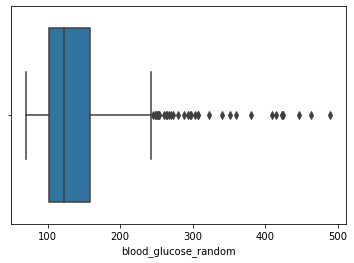

In [46]:
sns.boxplot(x=train["blood_glucose_random"])

<AxesSubplot:xlabel='potassium'>

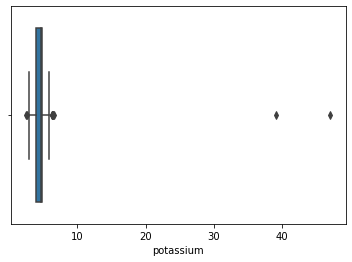

In [47]:
sns.boxplot(x=train["potassium"])

<AxesSubplot:xlabel='sodium'>

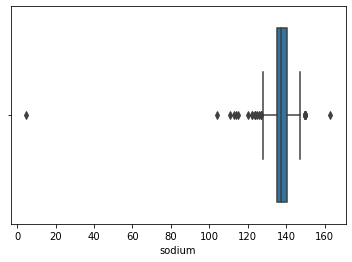

In [48]:
sns.boxplot(x=train["sodium"])

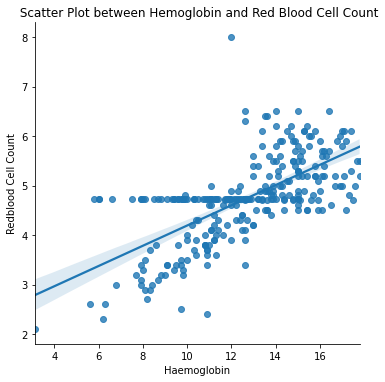

In [49]:
sns.lmplot(x= "haemoglobin", y= "red_blood_cell_count", data = train)
plt.title(" Scatter Plot between Hemoglobin and Red Blood Cell Count")
plt.xlabel("Haemoglobin")
plt.ylabel("Redblood Cell Count")
plt.show()

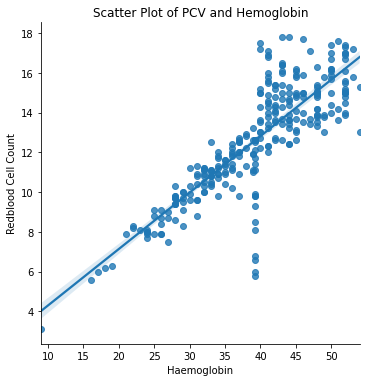

In [50]:
sns.lmplot(x= "packed_cell_volume", y= "haemoglobin", data = train)
plt.title("Scatter Plot of PCV and Hemoglobin")
plt.xlabel("Haemoglobin")
plt.ylabel("Redblood Cell Count")
plt.show()

## Correlation between age and blood pressure

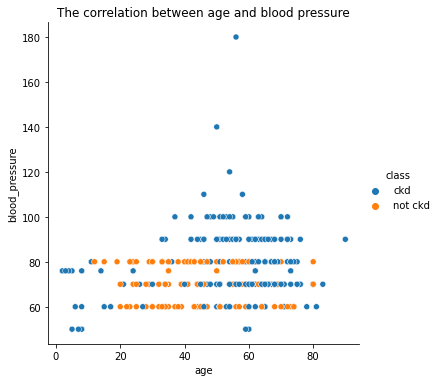

In [51]:
sns.relplot(x = 'age', y = 'blood_pressure', data = train, hue = 'class', legend="full")
plt.title('The correlation between age and blood pressure')
plt.show()

Note:
<ul>The older the person, the higher the blood pressure and is more likely to have chronic kidney disease</ul>

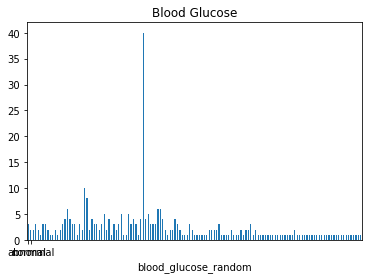

In [52]:
# Display blood glucose in bar chart
df.groupby(train['blood_glucose_random']).count()['class'].plot(kind = 'bar', title = 'Blood Glucose')
plt.xticks(np.arange(2), ('normal','abnormal'), rotation = 0)
plt.show()

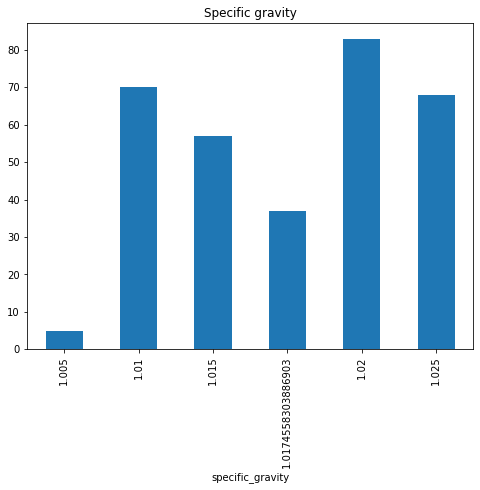

In [53]:
# Display specific gravity in bar chart
df.groupby(train['specific_gravity']).count()['class'].plot(kind = 'bar', title = 'Specific gravity', figsize = (8, 6))
# plt.xticks(np.arange(3), rotation = 0)
plt.show()

#getting dummies for these columns with help of pandas library
train=pd.get_dummies(train,columns=['red_blood_cells', 'albumin'
 'pus_cell', 'sugar'
 'pus_cell_clumps',
 'bacteria',
 'hypertension',
 'diabetes_mellitus',
 'coronary_artery_disease',
 'appetite',
 'peda_edema',
 'aanemia'], drop_first=True)

#check out the dataset with new changes
train.head()

## Modelling

In [125]:
def x_y_split(name_of_data):
    '''To split the train data into X and y'''
    X = name_of_data.drop(['class'], axis =1)
    y = name_of_data['class']
    return X,y

In [126]:
#splitting train data into train_x and train_y
train_X,train_y = x_y_split(train)

In [127]:
#defining the numerical and categorical columns seperately
num_feats = ['age','blood_pressure','specific_gravity','blood_glucose_random','blood_urea','serum_creatinine','sodium','potassium','haemoglobin','packed_cell_volume','white_blood_cell_count','red_blood_cell_count']
cat_feats = ['albumin','sugar','red_blood_cells','pus_cell','pus_cell_clumps','bacteria','hypertension','diabetes_mellitus','coronary_artery_disease','appetite','peda_edema','aanemia']

In [128]:
num_f = [0,1,2,9,10,11,12,13,14,15,16,17]
print(len(num_f))
cat_f = [3,4,5,6,7,8,18,19,20,21,22,23]
print(len(cat_f))

12
12


In [129]:
train_X.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia
3,48.0,70.0,1.005000,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.900000,yes,no,no,poor,yes,yes
18,60.0,100.0,1.025000,0.0,3.0,normal,normal,notpresent,notpresent,263.0,27.0,1.3,135.0,4.3,12.7,37.0,11400.0,4.300000,yes,yes,yes,good,no,no
202,78.0,60.0,1.017456,0.0,0.0,normal,normal,notpresent,notpresent,114.0,74.0,2.9,135.0,5.9,8.0,24.0,8050.0,4.723697,no,yes,no,good,no,yes
250,40.0,80.0,1.025000,0.0,0.0,normal,normal,notpresent,notpresent,140.0,10.0,1.2,135.0,5.0,15.0,48.0,10400.0,4.500000,no,no,no,good,no,no
274,19.0,80.0,1.020000,0.0,0.0,normal,normal,notpresent,notpresent,107.0,23.0,0.7,141.0,4.2,14.4,44.0,8050.0,4.723697,no,no,no,good,no,no


In [130]:
def pipeline_transformer(num_features, cat_features):
    """ - To transform numerical variables and categorical variables separately and then concatenate them.
    - You will first create 2 separate lists of variable names for the numerical variables and categorical variables.
    - num_features = list of numerical variable names
    - cat_features = list of categorical variable names
    """
    num_pipe = Pipeline([('Scaler', StandardScaler())])
    cat_pipe = Pipeline([('Encoder', OneHotEncoder(handle_unknown = 'ignore'))])
    
    full_pipe = ColumnTransformer([('nums', num_pipe, num_features), ('cats', cat_pipe, cat_features)])
    
    return full_pipe

In [131]:
pipeline = pipeline_transformer(num_f,cat_f)
trainX_process = pipeline.fit_transform(train_X)
trainX_process

array([[-1.67166675e-01, -4.31136803e-01, -2.29595710e+00, ...,
         1.00000000e+00,  0.00000000e+00,  1.00000000e+00],
       [ 5.24179092e-01,  1.74094916e+00,  1.39060097e+00, ...,
         0.00000000e+00,  1.00000000e+00,  0.00000000e+00],
       [ 1.56119774e+00, -1.15516546e+00, -4.09290165e-13, ...,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+00],
       ...,
       [-1.60747036e+00,  2.92891850e-01,  1.39060097e+00, ...,
         0.00000000e+00,  1.00000000e+00,  0.00000000e+00],
       [-7.43288148e-01,  2.92891850e-01,  4.68961451e-01, ...,
         0.00000000e+00,  1.00000000e+00,  0.00000000e+00],
       [-1.95314324e+00, -1.15516546e+00, -1.37431758e+00, ...,
         0.00000000e+00,  1.00000000e+00,  0.00000000e+00]])

### Spotchecking Algorithms

In [132]:
# define the pipeline
models = []

models.append(('LR', LogisticRegression()))
models.append(('DTC', DecisionTreeClassifier()))
models.append(('SVC', SVC()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('RFC', RandomForestClassifier()))


# empty lists to store model names and results
results = []
names = []

# Kfold and cross validation parameters
seed = 234
num_fold = 5
scoring = 'accuracy'

for name, model in models:
    kfold = KFold(n_splits=num_fold)
    cv_results = cross_val_score(model, trainX_process, train_y, cv=kfold, scoring=scoring, n_jobs=-1)
    
#     # output to evaluate results
#     rmse = np.sqrt(-cv_results)
    
    # append each model results into empty lists created
    results.append(cv_results)
    names.append(name)
    
    get_score = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(get_score)

LR: 0.993750 (0.012500)
DTC: 0.959375 (0.030619)
SVC: 0.993750 (0.007655)
KNN: 0.934375 (0.031869)
RFC: 0.993750 (0.012500)


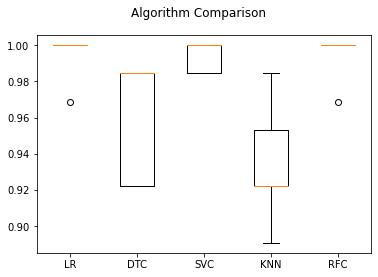

In [133]:
# Compare Algorithms

fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

## HyperParameter Tuning

In [134]:
# set parameters
kernel = ['linear','poly', 'rbf', 'sigmoid']
gamma = ['scale', 'auto']
param_grid = dict(kernel=kernel, gamma=gamma)

# instantiate model
model = SVC()

# Kfold and cross validation parameters
seed = 234
num_fold = 5
scoring = 'accuracy'

# gridsearchCV
kfold = KFold(n_splits=num_fold)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(trainX_process, train_y)

# print result
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.996875 using {'gamma': 'scale', 'kernel': 'poly'}
0.978125 (0.023385) with: {'gamma': 'scale', 'kernel': 'linear'}
0.996875 (0.006250) with: {'gamma': 'scale', 'kernel': 'poly'}
0.993750 (0.007655) with: {'gamma': 'scale', 'kernel': 'rbf'}
0.971875 (0.020729) with: {'gamma': 'scale', 'kernel': 'sigmoid'}
0.978125 (0.023385) with: {'gamma': 'auto', 'kernel': 'linear'}
0.990625 (0.018750) with: {'gamma': 'auto', 'kernel': 'poly'}
0.993750 (0.007655) with: {'gamma': 'auto', 'kernel': 'rbf'}
0.978125 (0.015934) with: {'gamma': 'auto', 'kernel': 'sigmoid'}


### Training our best parameter on the train dataset

In [ ]:
model = SVC(gamma="scale", kernel="poly")
model.fit()

In [135]:
fullModel = Pipeline([('transformation', pipeline_transformer(num_f,cat_f)),
                     ('model', SVC(gamma="scale", kernel="poly"))])

In [136]:
array = train.values
trainX = array[:,0:24]
trainY = array[:,24]

In [138]:
fullModel.fit(trainX, trainY)

Pipeline(steps=[('transformation',
                 ColumnTransformer(transformers=[('nums',
                                                  Pipeline(steps=[('Scaler',
                                                                   StandardScaler())]),
                                                  [0, 1, 2, 9, 10, 11, 12, 13,
                                                   14, 15, 16, 17]),
                                                 ('cats',
                                                  Pipeline(steps=[('Encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [3, 4, 5, 6, 7, 8, 18, 19, 20,
                                                   21, 22, 23])])),
                ('model', SVC(kernel='poly'))])

In [50]:
#Training our best parameter on the train dataset
#model = SVC(gamma="scale", kernel="poly")
#model.fit(trainX_process, train_y)

### Testing the model on the test set

In [139]:
test['packed_cell_volume'] = convert_to_numeric(test,'packed_cell_volume')
test['white_blood_cell_count'] = convert_to_numeric(test,'white_blood_cell_count')
test['red_blood_cell_count'] = convert_to_numeric(test,'red_blood_cell_count')

In [140]:
test['age'] = fill_null.use_mean(test,'age')
test['blood_pressure'] = fill_null.use_mean(test,'blood_pressure')
test['specific_gravity'] = fill_null.use_mean(test,'specific_gravity')
test['sodium'] = fill_null.use_mean(test,'sodium')
test['potassium'] = fill_null.use_mean(test,'potassium')
test['haemoglobin'] = fill_null.use_mean(test,'haemoglobin')
test['red_blood_cell_count'] = fill_null.use_mean(test,'red_blood_cell_count')
test['packed_cell_volume'] = fill_null.use_mean(test,'packed_cell_volume')

In [141]:
test['blood_glucose_random'] = fill_null.use_median(test,'blood_glucose_random')
test['blood_urea'] = fill_null.use_median(test,'blood_urea')
test['serum_creatinine'] = fill_null.use_median(test,'serum_creatinine')                                                   
test['white_blood_cell_count'] = fill_null.use_median(test,'white_blood_cell_count') 

In [142]:
test['albumin'] = fill_null.use_mode(test,'albumin') 
test['red_blood_cells'] = fill_null.use_mode(test,'red_blood_cells') 
test['pus_cell'] = fill_null.use_mode(test,'pus_cell') 
test['pus_cell_clumps'] = fill_null.use_mode(test,'pus_cell_clumps') 
test['bacteria'] = fill_null.use_mode(test,'bacteria') 
test['sugar'] = fill_null.use_mode(test,'sugar') 
test['hypertension'] = fill_null.use_mode(test,'hypertension') 
test['diabetes_mellitus'] = fill_null.use_mode(test,'diabetes_mellitus') 
test['coronary_artery_disease'] = fill_null.use_mode(test,'coronary_artery_disease') 
test['appetite'] = fill_null.use_mode(test,'appetite') 
test['peda_edema'] = fill_null.use_mode(test,'peda_edema') 
test['aanemia'] = fill_null.use_mode(test,'aanemia') 

In [143]:
test['albumin'] = convert_to_str(test, 'albumin')
test['sugar'] = convert_to_str(test, 'sugar')

In [144]:
test['diabetes_mellitus'] = replace_values(test, 'diabetes_mellitus', {'\tno':'no','\tyes':'yes',' yes':'yes'})
test['coronary_artery_disease'] = replace_values(test, 'coronary_artery_disease', {'\tno':'no'})
test['class'] = replace_values(test, 'class', {'ckd\t': 'ckd', 'notckd': 'not ckd'})

In [145]:
#test_X,test_y = x_y_split(test)

array = test.values
test_X = array[:,0:24]
test_y = array[:,24]

In [146]:
test_pred = fullModel.predict(test_X)
test_pred

array(['ckd', 'not ckd', 'ckd', 'ckd', 'ckd', 'ckd', 'not ckd', 'ckd',
       'not ckd', 'ckd', 'ckd', 'not ckd', 'ckd', 'ckd', 'ckd', 'ckd',
       'not ckd', 'not ckd', 'ckd', 'not ckd', 'ckd', 'ckd', 'not ckd',
       'not ckd', 'ckd', 'not ckd', 'ckd', 'ckd', 'not ckd', 'ckd',
       'not ckd', 'ckd', 'not ckd', 'ckd', 'ckd', 'ckd', 'ckd', 'not ckd',
       'ckd', 'ckd', 'not ckd', 'ckd', 'ckd', 'ckd', 'ckd', 'not ckd',
       'ckd', 'ckd', 'ckd', 'ckd', 'ckd', 'not ckd', 'not ckd', 'ckd',
       'not ckd', 'ckd', 'ckd', 'ckd', 'ckd', 'ckd', 'ckd', 'not ckd',
       'not ckd', 'ckd', 'ckd', 'ckd', 'not ckd', 'not ckd', 'not ckd',
       'ckd', 'not ckd', 'ckd', 'ckd', 'ckd', 'not ckd', 'ckd', 'ckd',
       'not ckd', 'ckd', 'not ckd'], dtype=object)

In [60]:
#do not fit_transfrom when dealing with the test data, only transform.
#testX_process = pipeline.transform(test_X)
#testX_process

In [61]:
#To predict the test

#test_predict = model.predict(testX_process)

In [62]:
test_y

209        ckd
280    not ckd
33         ckd
210        ckd
93         ckd
        ...   
246        ckd
227        ckd
369    not ckd
176        ckd
289    not ckd
Name: class, Length: 80, dtype: object

In [63]:
accuracy_score(test_y,test_pred)

1.0

In [64]:
print(classification_report(test_y,test_pred))

              precision    recall  f1-score   support

         ckd       1.00      1.00      1.00        52
     not ckd       1.00      1.00      1.00        28

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



In [65]:
print(confusion_matrix(test_y,test_pred))

[[52  0]
 [ 0 28]]


### Saving the model

In [75]:
# open a file, where you ant to store the data
file = open('kd_model.pkl', 'wb')

# dump information to that file
pickle.dump(fullModel, file)

In [7]:
di = {'name': 'fhuad', 'school': 'fgcl'}
import json
import pandas as pd
js = json.dumps(di)
js
#df_js = pd.read_json(js, lines=True)
#df_js

'{"name": "fhuad", "school": "fgcl"}'

In [150]:
dictData = {
  "age": 24.0,
  "blood_pressure": 80,
  "specific_gravity": 1.020,
  "albumin": 1.0,
  "sugar": 3.0,
  "red_blood_cells": "normal",
  "pus_cell": "normal",
  "pus_cell_clumps": "notpresent",
  "bacteria": "notpresent",
  "blood_glucose_random": 121.0,
  "blood_urea": 36.0,
  "serum_creatinine": 1.2,
	"sodium": 111.0,
	"potassium": 2.5,
  "haemoglobin": 15.4,
  "packed_cell_volume": 44,
  "white_blood_cell_count": 7800,
  "red_blood_cell_count": 5.2,
  "hypertension": "yes",
  "diabetes_mellitus": "yes",
  "coronary_artery_disease": "no",
  "appetite": "good",
  "peda_edema": "no",
  "aanemia": "yes"
}
dfa = pd.DataFrame.from_dict([dictData])

dfa.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia
0,24.0,80,1.02,1.0,3.0,normal,normal,notpresent,notpresent,121.0,36.0,1.2,111.0,2.5,15.4,44,7800,5.2,yes,yes,no,good,no,yes


In [152]:
arrayd = dfa.values
array_data = arrayd[:,0:24]
array_data

array([[24.0, 80, 1.02, 1.0, 3.0, 'normal', 'normal', 'notpresent',
        'notpresent', 121.0, 36.0, 1.2, 111.0, 2.5, 15.4, 44, 7800, 5.2,
        'yes', 'yes', 'no', 'good', 'no', 'yes']], dtype=object)

In [153]:
dfa_pred = fullModel.predict(array_data)
dfa_pred

array(['ckd'], dtype=object)

In [84]:
print(type(dfa_pred))

<class 'numpy.ndarray'>


In [81]:
import pandas as pd
  
data = {'name': 'fhuad',
        'age': 4.0}
#data.values()
arrayd = data.values
datad = arrayd[:,0:2]
print(datad)
#test_y = array[:,24]
#new = pd.DataFrame.from_dict([data])
#new.info()

TypeError: 'builtin_function_or_method' object is not subscriptable